SVM-RBF  (no scaling)     accuracy=0.904


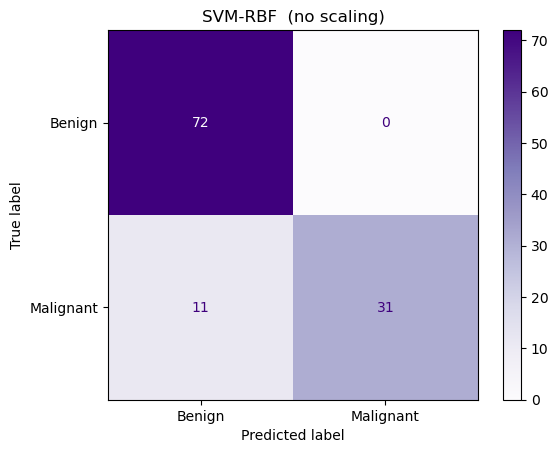

k-NN k=5 (no scaling)     accuracy=0.912


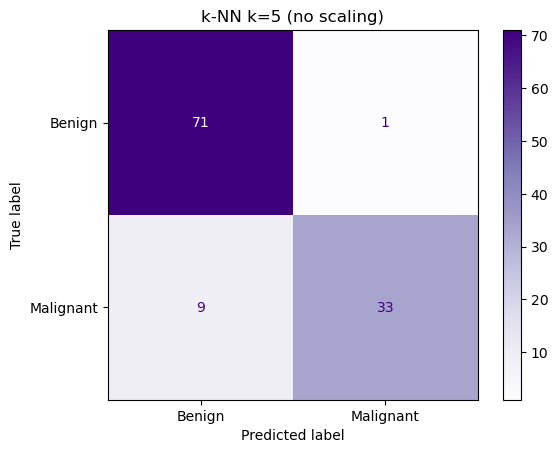

LogReg (no scaling)       accuracy=0.939


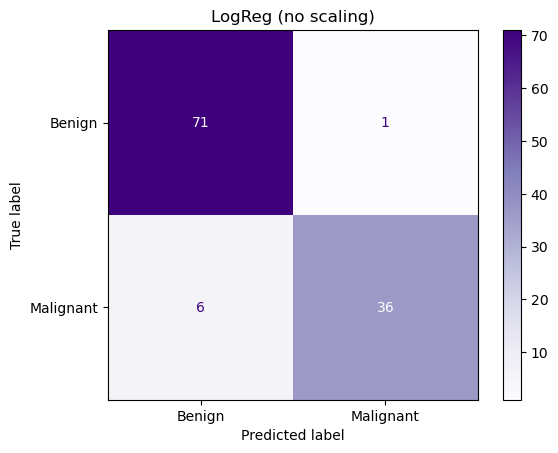

RandomForest (no scaling) accuracy=0.974


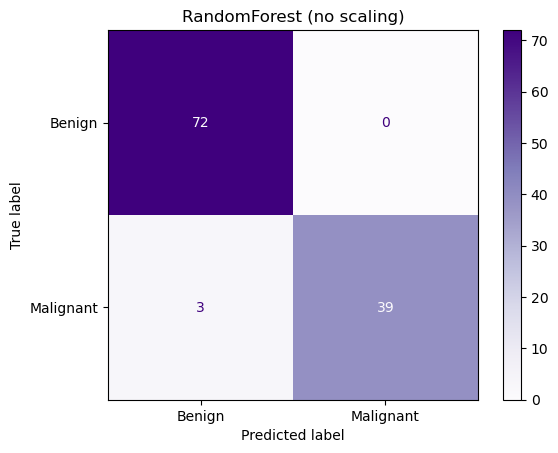

SVM-RBF + StandardScaler  accuracy=0.974


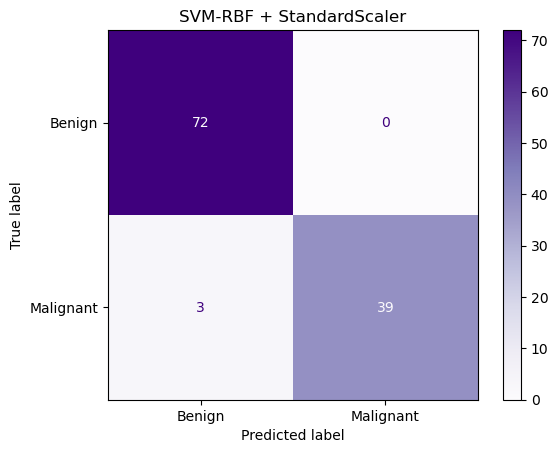

k-NN k=5 + StandardScaler accuracy=0.956


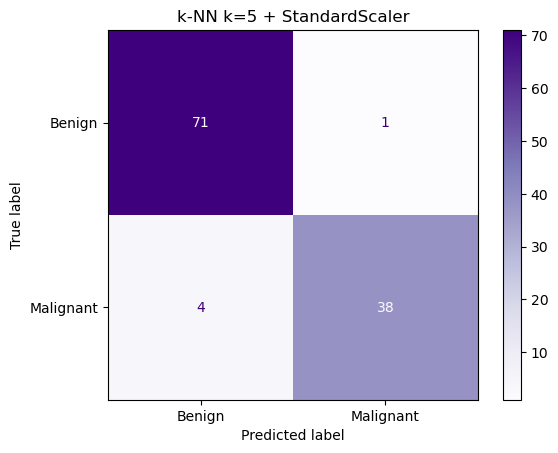

LogReg + StandardScaler   accuracy=0.965


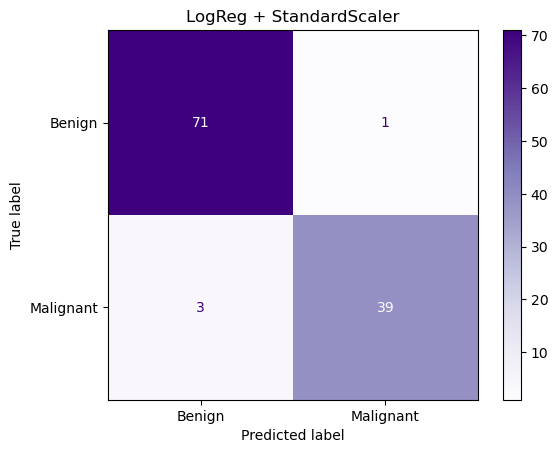

RandomForest (baseine)    accuracy=0.974


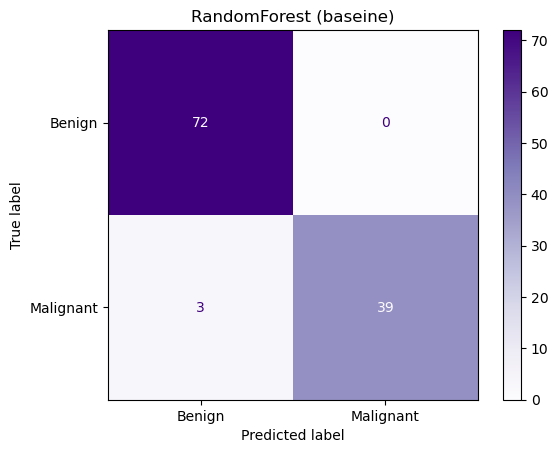

,model,accuracy
0,RandomForest (no scaling),0.973684
1,SVM-RBF + StandardScaler,0.973684
2,RandomForest (baseine),0.973684
3,LogReg + StandardScaler,0.964912
4,k-NN k=5 + StandardScaler,0.956140
5,LogReg (no scaling),0.938596
6,k-NN k=5 (no scaling),0.912281
7,SVM-RBF (no scaling),0.903509


In [76]:
###############################################################################
# Breast-Cancer Classification Benchmark
#
# Compares four supervised-learning algorithms—
#   • SVM (RBF), k-NN (k=5), Logistic Regression, Random Forest—
# on the “breast-cancer-wisconsin” dataset, and shows how applying
# StandardScaler impacts each model’s accuracy.
###############################################################################

# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Step 2: Load data
df = pd.read_csv(Path ("data") / "data.csv")
df = df.drop(["id"], axis=1) 

# Step 3: Features and Target
X = df.drop(["diagnosis"], axis=1)
y = (df["diagnosis"] == 'M').astype(int)

# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 5: Define the Evaluate function
def evaluate(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name:25s} accuracy={acc:.3f}")
    ConfusionMatrixDisplay.from_predictions(y_test, model.predict(X_test), display_labels=["Benign", "Malignant"], cmap="Purples")
    plt.title(name);
    plt.show()

    return {"model": name, "accuracy": acc}

# Step 6: Models without scaling
results = []
results.append(evaluate(SVC(kernel="rbf", C=1),  "SVM-RBF  (no scaling)"))
results.append(evaluate(KNeighborsClassifier(5), "k-NN k=5 (no scaling)"))
results.append(evaluate(LogisticRegression(max_iter=5000), "LogReg (no scaling)"))
results.append(evaluate(RandomForestClassifier(n_estimators=300, random_state=42), "RandomForest (no scaling)"))

# Step 7: Same models with StandardScaler
results.append(evaluate(make_pipeline(StandardScaler(), SVC(kernel="rbf", C=1)), "SVM-RBF + StandardScaler"))
results.append(evaluate(make_pipeline(StandardScaler(), KNeighborsClassifier(5)), "k-NN k=5 + StandardScaler"))
results.append(evaluate(make_pipeline(StandardScaler(), LogisticRegression(max_iter=5000)), "LogReg + StandardScaler"))
results.append(evaluate(make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=300, random_state=42)), "RandomForest (baseine)"))

# Step 8: build and view the comparison table
results_df = pd.DataFrame(results).sort_values(by="accuracy", ascending=False).reset_index(drop=True)
display(results_df)